In [1]:
clear

/* local year 99 */
local year 1400

local RU U

/* local dir "~/Documents/Data/HEIS/`year'/csv" */
local dir "~/Documents/Data/HEIS/100/csv"

/* local dir_sum "~/Documents/Data/HEIS/DataSummary/13`year'" */
local dir_sum "~/Documents/Data/HEIS/DataSummary/`year'"

```TODO```
- Rahn
- tarigh tahiye
- cat

# Load HH monthly expenditure

## Load Data from HEIS tables

In [2]:
/* clear
local path "`dir'/R/R`year'P3S01.csv"
import delimited "`path'", delimiter(",") clear //
des

list */

In [45]:
tempfile monthly_tempfile
save `monthly_tempfile', replace empty



(note: file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000004 not
>  found)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000004 saved


In [46]:
local tables 01 02
foreach table of local tables {
    local path "`dir'/`RU'/`RU'`year'P3S`table'.csv"
    import delimited "`path'", delimiter(",") clear //
    
    // keep only if HH has paid for it.
    drop if dycol02 != 1

    rename dycol06 value
    rename dycol01 good_code
    
    keep address good_code value

    append using `monthly_tempfile'
    save `monthly_tempfile', replace
}


local tables 03 05 06 07 08 09 11 12
foreach table of local tables {
    local path "`dir'/`RU'/`RU'`year'P3S`table'.csv"
    import delimited "`path'", delimiter(",") clear //
    
    // keep only if HH has paid for it.
    drop if dycol02 != 1

    rename dycol03 value
    rename dycol01 good_code
    keep address good_code value

    append using `monthly_tempfile'
    save `monthly_tempfile', replace
}



local tables 04
foreach table of local tables {
    local path "`dir'/`RU'/`RU'`year'P3S`table'.csv"
    import delimited "`path'", delimiter(",") clear //
    
    // keep only if HH has paid for it.
    destring dycol03, replace
    drop if dycol03 != 1

    rename dycol04 value
    rename dycol01 good_code
    
    // Rahn value adjustment (3 to 100)
    replace value = value + (dycol02 / 100 * 3) if !missing(dycol02)

    keep address good_code value

    append using `monthly_tempfile'
    save `monthly_tempfile', replace
}



(7 vars, 617,720 obs)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000004 saved
(7 vars, 3,207 obs)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000004 saved


(4 vars, 30,896 obs)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000004 saved
(4 vars, 96,497 obs)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000004 saved
(4 vars, 34,081 obs)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000004 saved
(4 vars, 40,175 obs)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000004 saved
(4 vars, 43,990 obs)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000004 saved
(4 vars, 10,918 obs)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000004 saved
(4 vars, 14,931 obs)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000004 saved
(4 vars, 80,370 obs)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000004 saved


(5 vars, 85,990 obs)
dyc

In [47]:
save `monthly_tempfile', replace

/* save "`RU'_`year'_monthly_HH_exp.dta", replace */

file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000004 saved


In [48]:
des


Contains data from /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000
> 004
  obs:     1,078,256                          
 vars:            36                          22 Oct 2023 17:03
 size:   159,581,888                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
address         double  %10.0g                Address
good_code       long    %12.0g                DYCOL01
value           long    %12.0g                DYCOL04
yearly_cat_e~_0 float   %9.0g                 0 yearly_cat_exm_
yearly_cat_9_0  float   %9.0g                 0 yearly_cat_9_
yearly_cat_o~_0 float   %9.0g                 0 yearly_cat_other_
yearly_cat_ex~3 float   %9.0g                 3 yearly_cat_exm_
yearly_cat_9_3  float   %9.0g                 3 yearly_cat_9_
yearly_cat

---
## Add VAT-Rate

In [49]:
clear

import excel "../HEIS_Month_VAT_rate.xlsx", firstrow

/* gen good_code = string(cat) + string(sub_cat) */
destring good_code, replace

keep vat_rate good_code
merge 1:m good_code using `monthly_tempfile'
/* merge 1:m good_code using "`RU'_`year'_monthly_HH_exp.dta" */




good_code already numeric; no replace



    Result                           # of obs.
    -----------------------------------------
    not matched                        19,517
        from master                        23  (_merge==1)
        from using                     19,494  (_merge==2)

    matched                         1,058,762  (_merge==3)
    -----------------------------------------


In [50]:
/* list vat_rate good_code if _merge == 2 */

drop if _merge == 1
drop _merge


(23 observations deleted)



In [52]:
tab vat_rate [w=value]

(frequency weights assumed)

   vat_rate |      Freq.     Percent        Cum.
------------+-----------------------------------
         -1 | 3.3243e+11       32.28       32.28
          0 | 3.4997e+11       33.98       66.26
          9 | 2.6993e+11       26.21       92.47
         15 | 9063902810        0.88       93.35
         16 | 3407472800        0.33       93.68
         25 | 4103460000        0.40       94.08
         30 |19198901000        1.86       95.95
         40 | 2632775000        0.26       96.20
        100 |39120480000        3.80      100.00
------------+-----------------------------------
      Total | 1.0299e+12      100.00


## Export goods weight

In [11]:
preserve 
egen total_good_exp = sum(value), by(good_code)
keep total_good_exp good_code
duplicates drop
egen weight_sum = sum(total_good_exp)
gen weight = total_good_exp / weight_sum * 100

keep good_code weight
export excel using "monthly_good_weight_`year'_`RU'.xlsx", replace firstrow(variables)
/* gsort -avg_good_exp */
/* tab good_code [w=int(avg_good_exp)], sort */
restore






Duplicates in terms of all variables

(1,029,308 observations deleted)




file monthly_good_weight_1400_U.xlsx saved



---
## Add good Category

In [53]:
/* drop good_cat */

gen good_cat = ""
replace good_cat = "0" + substr(string(good_code), 1, 3) if length(string(good_code)) == 5
replace good_cat = substr(string(good_code), 1, 4) if length(string(good_code)) == 6


(1,078,256 missing values generated)



variable good_cat was str1 now str4
(963,461 real changes made)

(95,301 real changes made)


In [54]:
/* drop category */

gen category = 0
replace category = 1  if substr(good_cat, 1, 2) == "01" | substr(good_cat, 1, 3) == "021"
/* replace category = 2  if substr(good_cat, 1, 2) == "02" */

replace category = 3  if substr(good_cat, 1, 2) == "03"
replace category = 4  if substr(good_cat, 1, 2) == "04"
replace category = 5  if substr(good_cat, 1, 2) == "05"
replace category = 6  if substr(good_cat, 1, 2) == "06"
replace category = 7  if substr(good_cat, 1, 2) == "07"
replace category = 8  if substr(good_cat, 1, 2) == "08"
replace category = 9  if substr(good_cat, 1, 2) == "09"
replace category = 11 if substr(good_cat, 1, 2) == "11"
// 12 is others => zode zero


/* label define good_cat_label_fa ///
    0 "سایر" ///
    1 "خوراکی و نوشیدنی" ///
    3 "پوشاک" ///
    4 "مسکن، آب و فاضلاب و روشنایی" ///
    5 "مبلمان و لوازم خانگی و نگهداری" ///
    6 "بهداشتی و درمانی" ///
    7 "حمل و نقل" ///
    8 "ارتباطات، تلفن و موبایل" ///
    9 "سرگرمی و تجهیزات سمعی-بصری و یارانه" ///
    10 "آموزش" ///
    11 "غذای آماده، هتل و رستوران" 
    12 "بیمه" */

label define good_cat_label_en ///
    0 "others" ///
    1 "foods & drinks" ///
    3 "clothes" ///
    4 "home, water, light" ///
    5 "sofa, hose exp" ///
    6 "Healthcare" ///
    7 "tranportation" ///
    8 "connections, phone & mobile" ///
    9 "entertainment, multimedia, computer" ///
    10 "learning" ///
    11 "hotel, restrunt" ///
    12 "Insurance" 

label values category good_cat_label_en



(617,711 real changes made)

(30,896 real changes made)



(85,990 real changes made)

(96,497 real changes made)

(34,081 real changes made)

(40,175 real changes made)

(43,990 real changes made)

(10,918 real changes made)

(14,931 real changes made)




In [55]:
tab category [w = value]

(frequency weights assumed)

                           category |      Freq.     Percent        Cum.
------------------------------------+-----------------------------------
                             others |37416323900        3.63        3.63
                     foods & drinks | 3.5973e+11       34.93       38.56
                            clothes |57811237000        5.61       44.18
                 home, water, light | 3.9767e+11       38.61       82.79
                     sofa, hose exp |31849993350        3.09       85.88
                         Healthcare |63220082926        6.14       92.02
                      tranportation |45304182000        4.40       96.42
        connections, phone & mobile |20936704800        2.03       98.45
entertainment, multimedia, computer | 5444260000        0.53       98.98
                    hotel, restrunt |10479702000        1.02      100.00
------------------------------------+-----------------------------------
                      

## Aggrigate expenditure

In [56]:
drop if vat_rate == -1

In [57]:
/* drop tv* */

egen monthly_tv_exm = sum(value * (vat_rate == 0)), by(address)
egen monthly_tv_9 = sum(value * (vat_rate == 9)), by(address)
egen monthly_tv_other = sum(value * ((vat_rate != 9) & (vat_rate != 0))), by(address)

In [58]:
egen monthly_cat_exm_ = sum(value * (vat_rate == 0)), by(address category)
egen monthly_cat_9_ = sum(value * (vat_rate == 9)), by(address category)
egen monthly_cat_other_ = sum(value * ((vat_rate != 9) & (vat_rate != 0))), by(address category)

In [59]:
keep address category monthly_tv* monthly_cat*
duplicates drop

reshape wide monthly_cat*, i(address) j(category)




Duplicates in terms of all variables

(928,527 observations deleted)

(note: j = 0 1 3 4 5 6 7 8 9 11)

Data                               long   ->   wide
-----------------------------------------------------------------------------
Number of obs.                   149729   ->   19620
Number of variables                   8   ->      34
j variable (10 values)         category   ->   (dropped)
xij variables:
                       monthly_cat_exm_   ->   monthly_cat_exm_0 monthly_cat_exm
> _1 ... monthly_cat_exm_11
                         monthly_cat_9_   ->   monthly_cat_9_0 monthly_cat_9_1 .
> .. monthly_cat_9_11
                     monthly_cat_other_   ->   monthly_cat_other_0 monthly_cat_o
> ther_1 ... monthly_cat_other_11
-----------------------------------------------------------------------------


In [60]:
des monthly_cat_9_*


              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
monthly_cat_9_0 float   %9.0g                 0 monthly_cat_9_
monthly_cat_9_1 float   %9.0g                 1 monthly_cat_9_
monthly_cat_9_3 float   %9.0g                 3 monthly_cat_9_
monthly_cat_9_4 float   %9.0g                 4 monthly_cat_9_
monthly_cat_9_5 float   %9.0g                 5 monthly_cat_9_
monthly_cat_9_6 float   %9.0g                 6 monthly_cat_9_
monthly_cat_9_7 float   %9.0g                 7 monthly_cat_9_
monthly_cat_9_8 float   %9.0g                 8 monthly_cat_9_
monthly_cat_9_9 float   %9.0g                 9 monthly_cat_9_
monthly_ca~9_11 float   %9.0g                 11 monthly_cat_9_


In [61]:
save `monthly_tempfile', replace
/* save "monthly_exp_`RU'_`year'.dta", replace */
/* save "`RU'_`year'_monthly_HH_exp_by_vat.dta", replace */

file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000004 saved


---
# Load HH yearly expenditure

## Load Data from HEIS

In [24]:
clear
tempfile yearly_tempfile
save `yearly_tempfile', replace empty




(note: dataset contains 0 observations)
(note: file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000003 not
>  found)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000003 saved


In [25]:
local tables 13
foreach table of local tables {
    local path "`dir'/`RU'/`RU'`year'P3S`table'.csv"
    import delimited "`path'", delimiter(",") clear //
    
    rename dycol05 value
    rename dycol01 good_code

    // keep only if HH has paid for it.
    destring dycol04 value good_code dycol06, replace
    drop if dycol04 != 1

    /* drop if (dycol06 > 0 && !missing(dycol06)) */
    
    keep address good_code value

    append using `yearly_tempfile'
    save `yearly_tempfile', replace
}



(7 vars, 220,419 obs)
dycol04 has all characters numeric; replaced as byte
(586 missing values generated)
value has all characters numeric; replaced as double
(585 missing values generated)
good_code already numeric; no replace
dycol06 has all characters numeric; replaced as double
(219486 missing values generated)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000003 saved


In [26]:
save `yearly_tempfile', replace

file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000003 saved


---
## Add VAT-rate 

In [27]:
clear

import excel "../HEIS_Yearly_VAT_rate.xlsx", firstrow

/* gen good_code = string(cat) + string(sub_cat) */
destring good_code, replace

keep vat_rate good_code
merge 1:m good_code using `yearly_tempfile'
/* merge 1:m good_code using "`RU'_`year'_monthly_HH_exp.dta" */




good_code already numeric; no replace



    Result                           # of obs.
    -----------------------------------------
    not matched                             6
        from master                         6  (_merge==1)
        from using                          0  (_merge==2)

    matched                           220,419  (_merge==3)
    -----------------------------------------


In [28]:
/* list vat_rate good_code if _merge == 1 */

drop if _merge == 1
drop _merge


(6 observations deleted)



In [29]:
tab vat_rate [w=value]

(frequency weights assumed)

   vat_rate |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 | 2.0194e+12       58.09       58.09
          9 | 9.5471e+11       27.46       85.55
        100 | 5.0235e+11       14.45      100.00
------------+-----------------------------------
      Total | 3.4764e+12      100.00


## Export goods weight

In [26]:
preserve 
egen total_good_exp = sum(value), by(good_code)
keep total_good_exp good_code
duplicates drop
egen weight_sum = sum(total_good_exp)
gen weight = total_good_exp / weight_sum * 100

keep good_code weight
export excel using "yearly_good_weight_`year'_`RU'.xlsx", replace
/* gsort -avg_good_exp */
/* tab good_code [w=int(avg_good_exp)], sort */
restore






Duplicates in terms of all variables

(196,137 observations deleted)




file yearly_good_weight_1400_U.xlsx saved



## Add good Category

In [30]:
/* drop good_cat */

gen good_cat = ""
replace good_cat = "0" + substr(string(good_code), 1, 3) if length(string(good_code)) == 5
replace good_cat = substr(string(good_code), 1, 4) if length(string(good_code)) == 6


(220,419 missing values generated)



variable good_cat was str1 now str4
(82,122 real changes made)

(138,297 real changes made)


In [37]:
/* drop category */

gen category = 0
/* replace category = 1  if substr(good_cat, 1, 3) == "01" */
replace category = 3  if substr(good_cat, 1, 2) == "03"
replace category = 4  if substr(good_cat, 1, 2) == "04"
replace category = 5  if substr(good_cat, 1, 2) == "05"
replace category = 6  if substr(good_cat, 1, 2) == "06"
replace category = 7  if substr(good_cat, 1, 2) == "07"
replace category = 8  if substr(good_cat, 1, 2) == "08"
replace category = 9  if substr(good_cat, 1, 2) == "09"
replace category = 10 if substr(good_cat, 1, 2) == "10"
// to 11
// 12 is others => code zero
replace category = 12 if substr(good_cat, 1, 3) == "125"
// 127 => others



/* label define good_cat_label ///
    0 "سایر" ///
    1 "خوراکی" ///
    3 "پوشاک" ///
    4 "مسکن، آب و فاضلاب و روشنایی" ///
    5 "مبلمان و لوازم خانگی و نگهداری" ///
    6 "بهداشتی و درمانی" ///
    7 "حمل و نقل" ///
    11 "غذای آماده، هتل و رستوران"
    10 "آموزش" ///
    11 "بیمه" */

label define good_cat_label_en ///
    0 "others" ///
    1 "foods & drinks" ///
    3 "clothes" ///
    4 "home, water, light" ///
    5 "sofa, hose exp" ///
    6 "Healthcare" ///
    7 "tranportation" ///
    8 "connections, phone & mobile" ///
    9 "entertainment, multimedia, computer" ///
    10 "learning" ///
    11 "hotel, restrunt" ///
    12 "Insurance" 

label values category good_cat_label_en



(37 real changes made)

(10,756 real changes made)

(8,878 real changes made)

(4,166 real changes made)

(35,791 real changes made)

(2,390 real changes made)

(20,104 real changes made)

(9,477 real changes made)

(63,288 real changes made)




In [38]:
tab category [w = value]

(frequency weights assumed)

                           category |      Freq.     Percent        Cum.
------------------------------------+-----------------------------------
                             others | 3.0872e+11        8.88        8.88
                            clothes |  686300000        0.02        8.90
                 home, water, light |87827995000        2.53       11.43
                     sofa, hose exp | 2.7324e+11        7.86       19.29
                         Healthcare | 1.8987e+11        5.46       24.75
                      tranportation | 7.3298e+11       21.08       45.83
        connections, phone & mobile |98108720000        2.82       48.65
entertainment, multimedia, computer |64913942300        1.87       50.52
                           learning | 1.2088e+11        3.48       54.00
                          Insurance | 1.5992e+12       46.00      100.00
------------------------------------+-----------------------------------
                      

## Aggrigate expenditure

In [39]:
/* tv = total_value */
/* drop tv* */

egen yearly_tv_exm = sum(value * (vat_rate == 0)), by(address)
egen yearly_tv_9 = sum(value * (vat_rate == 9)), by(address)
egen yearly_tv_other = sum(value * ((vat_rate != 9) & (vat_rate != 0) & (vat_rate != -1))), by(address)

In [40]:
egen yearly_cat_exm_ = sum(value * (vat_rate == 0)), by(address category)
egen yearly_cat_9_ = sum(value * (vat_rate == 9)), by(address category)
egen yearly_cat_other_ = sum(value * ((vat_rate != 9) & (vat_rate != 0) & (vat_rate != -1))), by(address category)

In [41]:
keep address category yearly_tv* yearly_cat*
duplicates drop

reshape wide yearly_cat*, i(address) j(category)




Duplicates in terms of all variables



(138,577 observations deleted)

(note: j = 0 3 4 5 6 7 8 9 10 12)

Data                               long   ->   wide
-----------------------------------------------------------------------------
Number of obs.                    81842   ->   19481
Number of variables                   8   ->      34
j variable (10 values)         category   ->   (dropped)
xij variables:
                        yearly_cat_exm_   ->   yearly_cat_exm_0 yearly_cat_exm_3
>  ... yearly_cat_exm_12
                          yearly_cat_9_   ->   yearly_cat_9_0 yearly_cat_9_3 ...
>  yearly_cat_9_12
                      yearly_cat_other_   ->   yearly_cat_other_0 yearly_cat_oth
> er_3 ... yearly_cat_other_12
-----------------------------------------------------------------------------


In [42]:
des yearly_cat_9_*


              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
yearly_cat_9_0  float   %9.0g                 0 yearly_cat_9_
yearly_cat_9_3  float   %9.0g                 3 yearly_cat_9_
yearly_cat_9_4  float   %9.0g                 4 yearly_cat_9_
yearly_cat_9_5  float   %9.0g                 5 yearly_cat_9_
yearly_cat_9_6  float   %9.0g                 6 yearly_cat_9_
yearly_cat_9_7  float   %9.0g                 7 yearly_cat_9_
yearly_cat_9_8  float   %9.0g                 8 yearly_cat_9_
yearly_cat_9_9  float   %9.0g                 9 yearly_cat_9_
yearly_cat_9_10 float   %9.0g                 10 yearly_cat_9_
yearly_cat_9_12 float   %9.0g                 12 yearly_cat_9_


In [43]:
keep address yearly_tv* yearly_cat*
duplicates drop




Duplicates in terms of all variables

(0 observations are duplicates)


In [44]:
save `yearly_tempfile', replace
/* save "yearly_exp_`RU'_`year'.dta", replace */
/* save "`RU'_`year'_monthly_HH_exp_by_vat.dta", replace */

file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000003 saved


---
# Merge yearly and monthly data

In [62]:
clear
use `monthly_tempfile'
merge 1:1 address using `yearly_tempfile'





    Result                           # of obs.
    -----------------------------------------
    not matched                           139
        from master                       139  (_merge==1)
        from using                          0  (_merge==2)

    matched                            19,481  (_merge==3)
    -----------------------------------------


In [63]:
drop _merge
/* des */

In [64]:
foreach var of varlist _all {
    replace `var' = 0 if missing(`var')
}

/* local vars monthly_tv_exm monthly_tv_9 monthly_tv_other
foreach var of local vars {
    replace `var' = 0 if missing(`var')
}

local vars yearly_tv_exm yearly_tv_9 yearly_tv_other
foreach var of local vars {
    replace `var' = 0 if missing(`var')
} */




(1 real change made)
(65 real changes made)
(65 real changes made)
(65 real changes made)
(78 real changes made)
(78 real changes made)
(78 real changes made)
(8,164 real changes made)
(8,164 real changes made)
(8,164 real changes made)
(2 real changes made)
(2 real changes made)
(2 real changes made)
(1,560 real changes made)
(1,560 real changes made)
(1,560 real changes made)
(5,886 real changes made)
(5,886 real changes made)
(5,886 real changes made)
(1,487 real changes made)
(1,487 real changes made)
(1,487 real changes made)
(356 real changes made)
(356 real changes made)
(356 real changes made)
(15,105 real changes made)
(15,105 real changes made)
(15,105 real changes made)
(13,768 real changes made)
(13,768 real changes made)
(13,768 real changes made)
(0 real changes made)
(0 real changes made)
(0 real changes made)
(804 real changes made)
(804 real changes made)
(804 real changes made)
(19,585 real changes made)
(19,585 real changes made)
(19,585 real changes made)
(13,283 r

In [65]:
/* drop simple_tv* */
gen simple_tv_exm = 12 * monthly_tv_exm + yearly_tv_exm
gen simple_tv_9 = 12 * monthly_tv_9 + yearly_tv_9
gen simple_tv_other = 12 * monthly_tv_other + yearly_tv_other

gen monthly_exm_ratio = monthly_tv_exm / (monthly_tv_exm + monthly_tv_9 + monthly_tv_other)
gen simple_exm_ratio = simple_tv_exm / (simple_tv_exm + simple_tv_9 + simple_tv_other)





(2 missing values generated)

(2 missing values generated)


### Exempt Ratio

In [66]:
codebook simple_exm_ratio


--------------------------------------------------------------------------------
simple_exm_ratio                                                     (unlabeled)
--------------------------------------------------------------------------------

                  type:  numeric (float)

                 range:  [0,.93859333]                units:  1.000e-10
         unique values:  19,567                   missing .:  2/19,620

                  mean:   .394685
              std. dev:   .136883

           percentiles:        10%       25%       50%       75%       90%
                           .219266   .300445   .393155   .487499   .572199


(bin=42, start=0, width=.02234746)


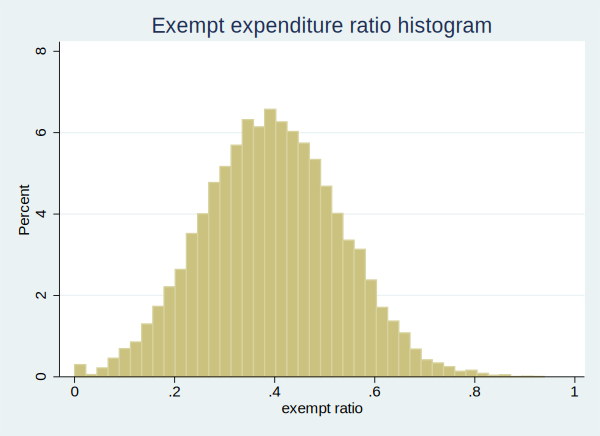

In [67]:
hist simple_exm_ratio, percent ///
    title("Exempt expenditure ratio histogram") ///
    xtitle("exempt ratio")

In [68]:
tempfile expenditure_tempfile
save `expenditure_tempfile', replace
/* save "total_exp_`RU'_`year'.dta", replace */
/* save "`RU'_`year'_monthly_HH_exp_by_vat.dta", replace */



(note: file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000005 not
>  found)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06603.000005 saved


---
# Add family characteristics

In [69]:
clear

import excel "`dir_sum'/Sum`RU'`year'.xlsx", firstrow clear //

In [70]:
rename ADDRESS address
destring address, replace

merge 1:1 address using `expenditure_tempfile'
/* merge 1:1 address using "`RU'_`year'_monthly_HH_exp_by_vat.dta" */



address has all characters numeric; replaced as double




    Result                           # of obs.
    -----------------------------------------
    not matched                             2
        from master                         0  (_merge==1)
        from using                          2  (_merge==2)

    matched                            19,618  (_merge==3)
    -----------------------------------------


In [71]:
drop if _merge == 1
drop _merge


(0 observations deleted)



In [72]:
gen calculated_exp = (simple_tv_exm + simple_tv_9 + simple_tv_other)
gen cal_exp_to_SC_exp = calculated_exp / NHazine
gen cal_exp_to_SC_exp_G = calculated_exp / GHazine

gen simple_exm_ratio_SC = simple_tv_9 / NHazineh



(2 missing values generated)

(2 missing values generated)


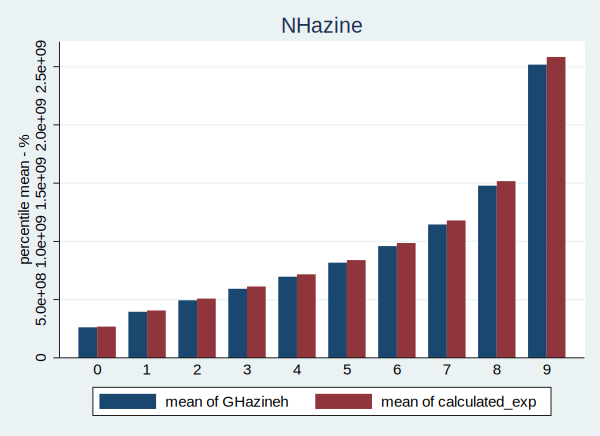

In [77]:
graph bar (mean) NHazine calculated_exp, over(C09New) ///
    title("NHazine") ///
    ytitle("percentile mean - %")

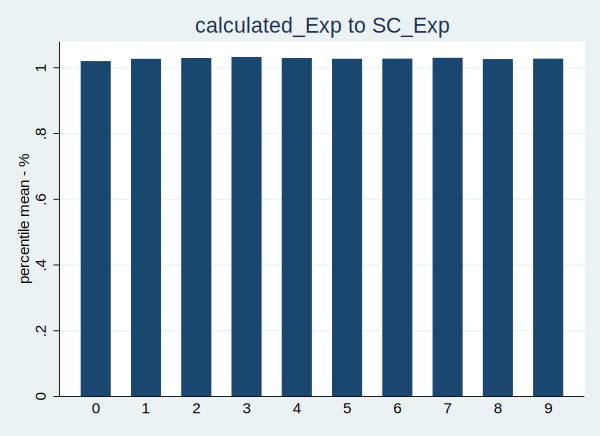

In [79]:
graph bar (mean) cal_exp_to_SC_exp_G, over(C09New) ///
    title("calculated_Exp to SC_Exp") ///
    ytitle("percentile mean - %")

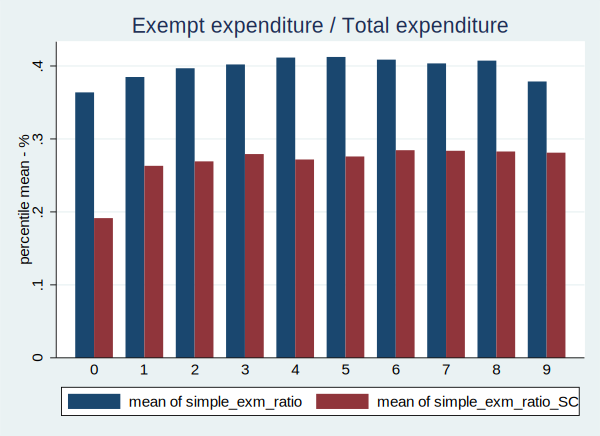

In [75]:
graph bar (mean) simple_exm_ratio simple_exm_ratio_SC, over(C09New) ///
    title("Exempt expenditure / Total expenditure") ///
    ytitle("percentile mean - %")

In [76]:
tabstat simple_exm_ratio, by(C09New)
/* tabstat simple_exm_ratio_SC, by(C09New) */


Summary for variables: simple_exm_ratio
     by categories of: C09New (C09New)

  C09New |      mean
---------+----------
       0 |  .3638264
       1 |  .3848899
       2 |  .3968811
       3 |  .4021017
       4 |  .4115537
       5 |  .4123826
       6 |  .4087128
       7 |  .4035429
       8 |  .4073373
       9 |  .3787625
---------+----------
   Total |  .3946847
--------------------


In [ ]:
tabstat simple_tv_exm [w=weight], s(sum, mean) 
tabstat simple_tv_9 [w=weight], s(sum, mean) 
tabstat simple_tv_other [w=weight], s(sum, mean) 


(analytic weights assumed)

    variable |       sum      mean
-------------+--------------------
simple_tv_~m |  6.14e+15  2.99e+08
----------------------------------

(analytic weights assumed)

    variable |       sum      mean
-------------+--------------------
 simple_tv_9 |  4.61e+15  2.25e+08
----------------------------------

(analytic weights assumed)

    variable |       sum      mean
-------------+--------------------
simple_tv_~r |  1.76e+15  8.58e+07
----------------------------------


In [47]:
/* drop simple_cat_*  */

local cats 0 3 4 5 6 7 8 9
foreach cat of local cats {
    gen simple_cat_exm_`cat'   = 12 * monthly_cat_exm_`cat'     + yearly_cat_exm_`cat'
    gen simple_cat_9_`cat'     = 12 * monthly_cat_9_`cat'       + yearly_cat_9_`cat'
    gen simple_cat_other_`cat' = 12 * monthly_cat_other_`cat'   + yearly_cat_other_`cat'
    gen simple_exm_ratio_cat_`cat' = simple_cat_exm_`cat' / (simple_cat_9_`cat' + simple_cat_exm_`cat' + simple_cat_other_`cat')
}

local cats 1 11
foreach cat of local cats {
    gen simple_cat_exm_`cat'   = 12 * monthly_cat_exm_`cat'  
    gen simple_cat_9_`cat'     = 12 * monthly_cat_9_`cat'    
    gen simple_cat_other_`cat' = 12 * monthly_cat_other_`cat'
    gen simple_exm_ratio_cat_`cat' = simple_cat_exm_`cat' / (simple_cat_9_`cat' + simple_cat_exm_`cat' + simple_cat_other_`cat')
}

local cats 10 12
foreach cat of local cats {
    gen simple_cat_exm_`cat'   = yearly_cat_exm_`cat'
    gen simple_cat_9_`cat'     = yearly_cat_9_`cat'
    gen simple_cat_other_`cat' = yearly_cat_other_`cat'
    gen simple_exm_ratio_cat_`cat' = simple_cat_exm_`cat' / (simple_cat_9_`cat' + simple_cat_exm_`cat' + simple_cat_other_`cat')


}

local cats 0 1 3 4 5 6 7 8 9 10 11 12
foreach cat of local cats {
    gen simple_ratio_SC_9_cat_`cat' = simple_cat_9_`cat' / NHazineh
    gen simple_ratio_SC_exm_cat_`cat' = simple_cat_9_`cat' / NHazineh
    
    gen simple_ratio_9_cat_`cat' = simple_cat_9_`cat' / calculated_exp
    gen simple_ratio_exm_cat_`cat' = simple_cat_9_`cat' / calculated_exp
}



(150 missing values generated)
(8,186 missing values generated)
(543 missing values generated)
(1,274 missing values generated)
(5,452 missing values generated)
(1,478 missing values generated)
(322 missing values generated)
(8,147 missing values generated)


(44 missing values generated)
(13,870 missing values generated)


(13,155 missing values generated)
(3,163 missing values generated)




(bin=42, start=.0776699, width=.02196024)


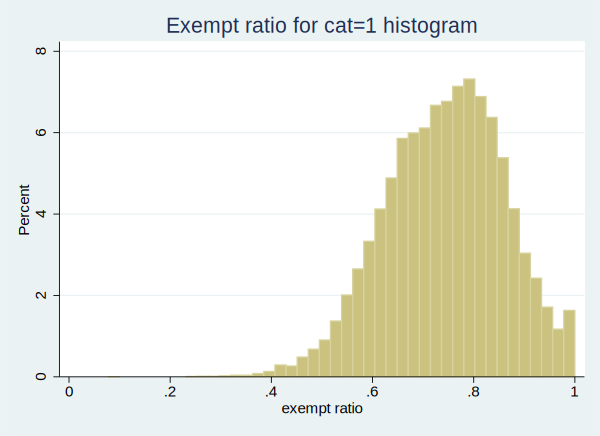

In [48]:
local cat 1
hist simple_exm_ratio_cat_`cat', percent ///
    title("Exempt ratio for cat=`cat' histogram") ///
    xtitle("exempt ratio")

## Exp(Simple) over percentile

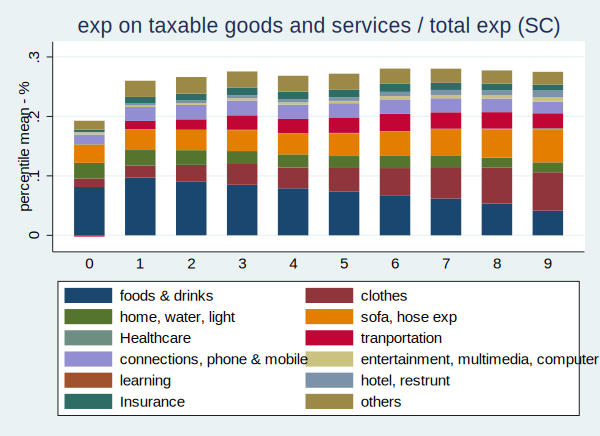

In [87]:
graph bar (mean) simple_ratio_SC_9_cat_1 simple_ratio_SC_9_cat_3 simple_ratio_SC_9_cat_4 simple_ratio_SC_9_cat_5 ///
    simple_ratio_SC_9_cat_6 simple_ratio_SC_9_cat_7 simple_ratio_SC_9_cat_8 simple_ratio_SC_9_cat_9 simple_ratio_SC_9_cat_10 simple_ratio_SC_9_cat_11 simple_ratio_SC_9_cat_12 simple_ratio_SC_9_cat_0 ///
    , over(C09New) stack ///
    title("exp on taxable goods and services / total exp (SC)") ///
    ytitle("percentile mean - %") ///
    legend(order(  ///
        1 "foods & drinks" ///
        2 "clothes" ///
        3 "home, water, light" ///
        4 "sofa, hose exp" ///
        5 "Healthcare" ///
        6 "tranportation" ///
        7 "connections, phone & mobile" ///
        8 "entertainment, multimedia, computer" ///
        9 "learning" ///
        10 "hotel, restrunt" ///
        11 "Insurance" ///
        12 "others" ///
    ))

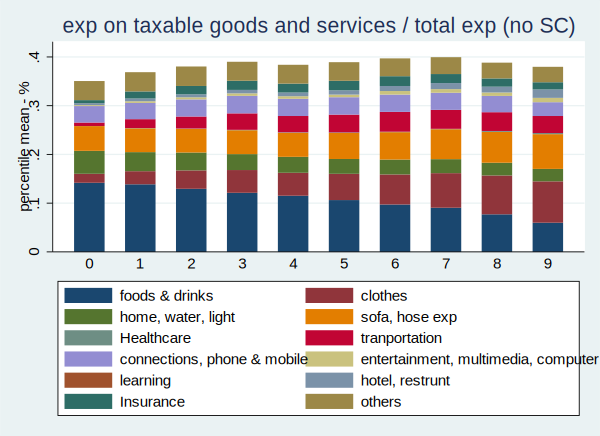

In [89]:
graph bar (mean) simple_ratio_9_cat_1 simple_ratio_9_cat_3 simple_ratio_9_cat_4 simple_ratio_9_cat_5 ///
    simple_ratio_9_cat_6 simple_ratio_9_cat_7 simple_ratio_9_cat_8 simple_ratio_9_cat_9 simple_ratio_9_cat_10 simple_ratio_9_cat_11 simple_ratio_9_cat_12 simple_ratio_9_cat_0 ///
    , over(C09New) stack ///
    title("exp on taxable goods and services / total exp (no SC)") ///
    ytitle("percentile mean - %") ///
    legend(order(  ///
        1 "foods & drinks" ///
        2 "clothes" ///
        3 "home, water, light" ///
        4 "sofa, hose exp" ///
        5 "Healthcare" ///
        6 "tranportation" ///
        7 "connections, phone & mobile" ///
        8 "entertainment, multimedia, computer" ///
        9 "learning" ///
        10 "hotel, restrunt" ///
        11 "Insurance" ///
        12 "others" ///
    ))

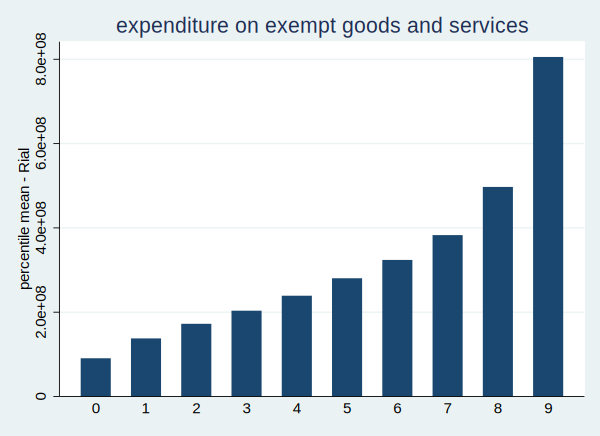

In [51]:
graph bar (mean) simple_tv_exm, over(C09New)  ///
    title("expenditure on exempt goods and services") ///
    ytitle("percentile mean - Rial")

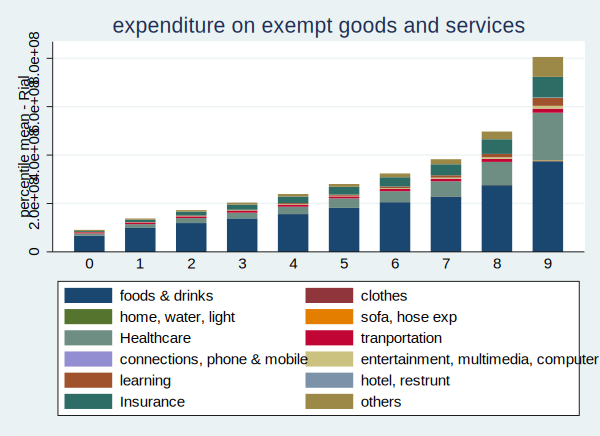

In [74]:
graph bar (mean) simple_cat_exm_1 simple_cat_exm_3 simple_cat_exm_4 simple_cat_exm_5 ///
    simple_cat_exm_6 simple_cat_exm_7 simple_cat_exm_8 simple_cat_exm_9 simple_cat_exm_10 simple_cat_exm_11 simple_cat_exm_12 simple_cat_exm_0 ///
    , over(C09New) stack ///
    title("expenditure on exempt goods and services") ///
    ytitle("percentile mean - Rial") ///
    legend(order(  ///
        1 "foods & drinks" ///
        2 "clothes" ///
        3 "home, water, light" ///
        4 "sofa, hose exp" ///
        5 "Healthcare" ///
        6 "tranportation" ///
        7 "connections, phone & mobile" ///
        8 "entertainment, multimedia, computer" ///
        9 "learning" ///
        10 "hotel, restrunt" ///
        11 "Insurance" ///
        12 "others" ///
    ))

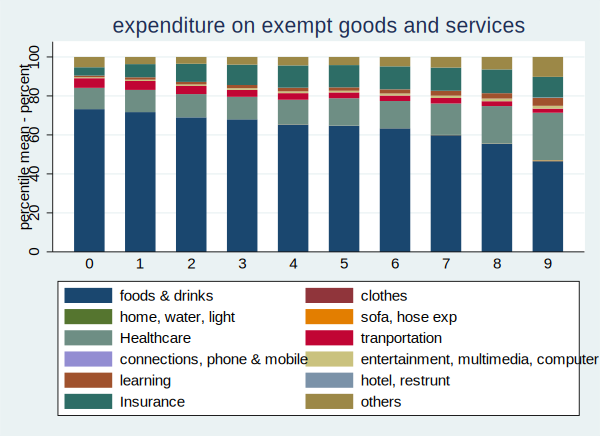

In [75]:
graph bar (mean) simple_cat_exm_1 simple_cat_exm_3 simple_cat_exm_4 simple_cat_exm_5 ///
    simple_cat_exm_6 simple_cat_exm_7 simple_cat_exm_8 simple_cat_exm_9 simple_cat_exm_10 simple_cat_exm_11 simple_cat_exm_12 simple_cat_exm_0 ///
    , over(C09New) stack percentages ///
    title("expenditure on exempt goods and services") ///
    ytitle("percentile mean - percent") ///
    legend(order(  ///
        1 "foods & drinks" ///
        2 "clothes" ///
        3 "home, water, light" ///
        4 "sofa, hose exp" ///
        5 "Healthcare" ///
        6 "tranportation" ///
        7 "connections, phone & mobile" ///
        8 "entertainment, multimedia, computer" ///
        9 "learning" ///
        10 "hotel, restrunt" ///
        11 "Insurance" ///
        12 "others" ///
    ))

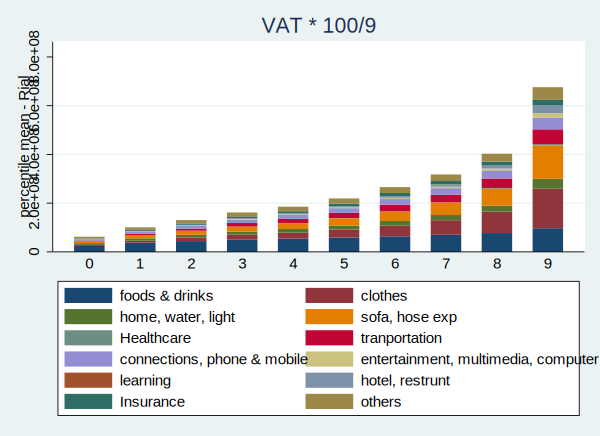

In [76]:
graph bar (mean) simple_cat_9_1 simple_cat_9_3 simple_cat_9_4 simple_cat_9_5 ///
    simple_cat_9_6 simple_cat_9_7 simple_cat_9_8 simple_cat_9_9 simple_cat_9_10 simple_cat_9_11 simple_cat_9_12 simple_cat_9_0 ///
    , over(C09New) stack  ///
    title("VAT * 100/9") ///
    ytitle("percentile mean - Rial") ///
    legend(order(  ///
        1 "foods & drinks" ///
        2 "clothes" ///
        3 "home, water, light" ///
        4 "sofa, hose exp" ///
        5 "Healthcare" ///
        6 "tranportation" ///
        7 "connections, phone & mobile" ///
        8 "entertainment, multimedia, computer" ///
        9 "learning" ///
        10 "hotel, restrunt" ///
        11 "Insurance" ///
        12 "others" ///
    ))

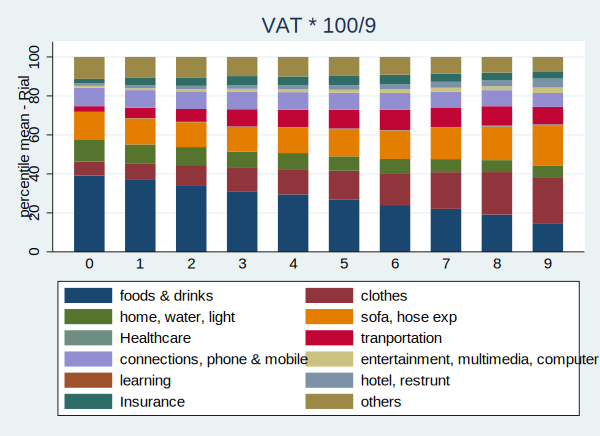

In [77]:
graph bar (mean) simple_cat_9_1 simple_cat_9_3 simple_cat_9_4 simple_cat_9_5 ///
    simple_cat_9_6 simple_cat_9_7 simple_cat_9_8 simple_cat_9_9 simple_cat_9_10 simple_cat_9_11 simple_cat_9_12 simple_cat_9_0 ///
    , over(C09New) stack per ///
    title("VAT * 100/9") ///
    ytitle("percentile mean - Rial") ///
    legend(order(  ///
        1 "foods & drinks" ///
        2 "clothes" ///
        3 "home, water, light" ///
        4 "sofa, hose exp" ///
        5 "Healthcare" ///
        6 "tranportation" ///
        7 "connections, phone & mobile" ///
        8 "entertainment, multimedia, computer" ///
        9 "learning" ///
        10 "hotel, restrunt" ///
        11 "Insurance" ///
        12 "others" ///
    ))

#### Monthly exp

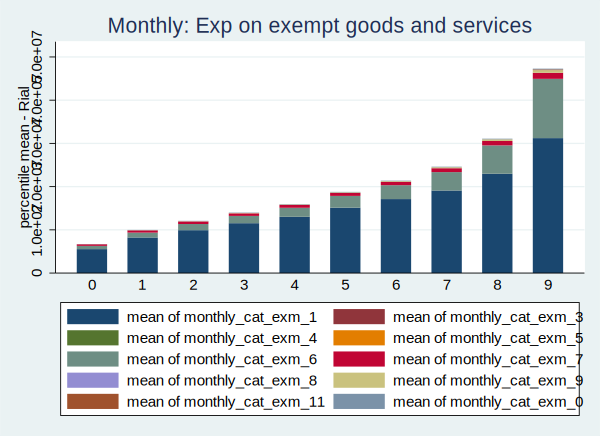

In [57]:
graph bar (mean) monthly_cat_exm_1 monthly_cat_exm_3 monthly_cat_exm_4 monthly_cat_exm_5 ///
    monthly_cat_exm_6 monthly_cat_exm_7 monthly_cat_exm_8 monthly_cat_exm_9 monthly_cat_exm_11 monthly_cat_exm_0 ///
    , over(C09New) stack  ///
    title("Monthly: Exp on exempt goods and services") ///
    ytitle("percentile mean - Rial")


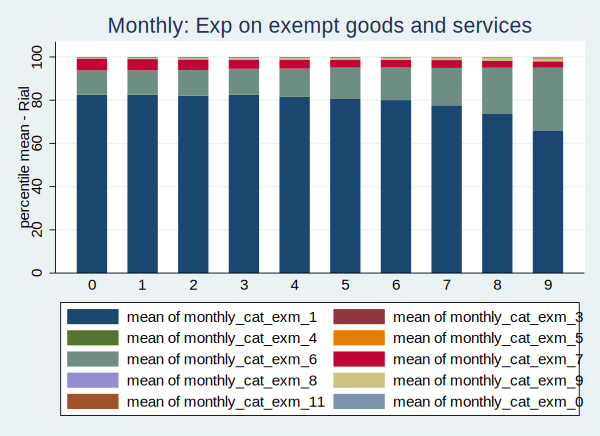

In [58]:
graph bar (mean) monthly_cat_exm_1 monthly_cat_exm_3 monthly_cat_exm_4 monthly_cat_exm_5 ///
    monthly_cat_exm_6 monthly_cat_exm_7 monthly_cat_exm_8 monthly_cat_exm_9 monthly_cat_exm_11 monthly_cat_exm_0 ///
    , over(C09New) stack per ///
    title("Monthly: Exp on exempt goods and services") ///
    ytitle("percentile mean - Rial")


#### Yearly exp

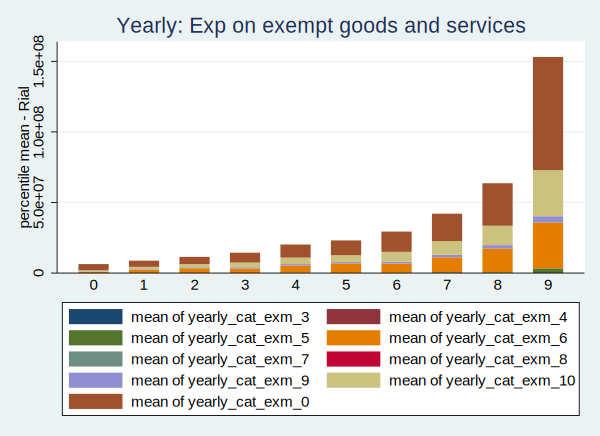

In [59]:
graph bar (mean)  yearly_cat_exm_3 yearly_cat_exm_4 yearly_cat_exm_5 ///
    yearly_cat_exm_6 yearly_cat_exm_7 yearly_cat_exm_8 yearly_cat_exm_9 yearly_cat_exm_10 yearly_cat_exm_0 ///
    , over(C09New) stack  ///
    title("Yearly: Exp on exempt goods and services") ///
    ytitle("percentile mean - Rial")


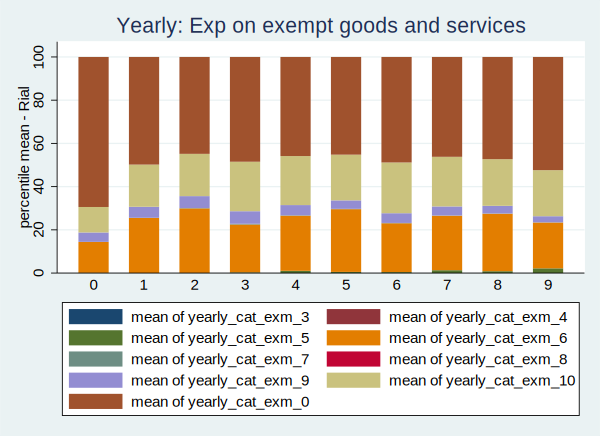

In [60]:
graph bar (mean)  yearly_cat_exm_3 yearly_cat_exm_4 yearly_cat_exm_5 ///
    yearly_cat_exm_6 yearly_cat_exm_7 yearly_cat_exm_8 yearly_cat_exm_9 yearly_cat_exm_10 yearly_cat_exm_0 ///
    , over(C09New) stack per ///
    title("Yearly: Exp on exempt goods and services") ///
    ytitle("percentile mean - Rial")


## Exempt Ratio(Simple) over percentile

In [61]:
/* drop simple_exm_ratio_cat_* my_exp exp_to_SC_exp simple_exm_ratio_SC */

gen simple_exm_ratio_cat_1_ = simple_cat_exm_1 / (simple_tv_exm + simple_tv_9 + simple_tv_other)
gen simple_exm_ratio_cat_6_12_ = (simple_cat_exm_6 + simple_cat_exm_12 ) / (simple_tv_exm + simple_tv_9 + simple_tv_other)
gen simple_exm_ratio_cat_inc_ = (simple_cat_exm_6 + simple_cat_exm_12 + simple_cat_exm_0) / (simple_tv_exm + simple_tv_9 + simple_tv_other)

gen simple_exm_ratio_cat_1_SC = simple_cat_exm_1 / NHazine
gen simple_exm_ratio_cat_6_12_SC = (simple_cat_exm_6 + simple_cat_exm_12) / NHazine
gen simple_exm_ratio_cat_inc_SC = (simple_cat_exm_6 + simple_cat_exm_12 + simple_cat_exm_0) / NHazine

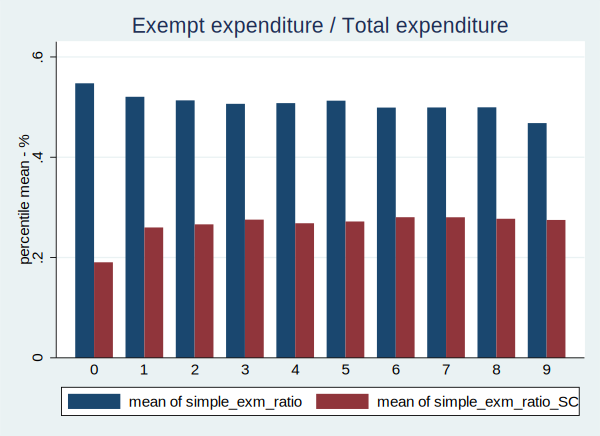

In [65]:
/* graph bar (mean) simple_exm_ratio, over(C09New) ///
    title("Exempt expenditure / Total taxable expenditure") ///
    ytitle("percentile mean - %") */

graph bar (mean) simple_exm_ratio simple_exm_ratio_SC, over(C09New) ///
    title("Exempt expenditure / Total expenditure") ///
    ytitle("percentile mean - %")

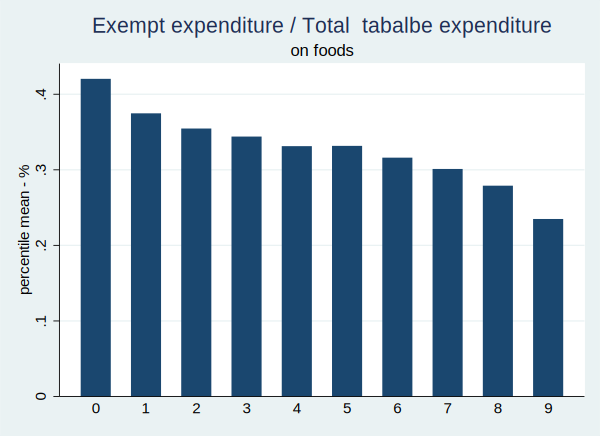

In [66]:
graph bar (mean) simple_exm_ratio_cat_1_ , over(C09New) ///
    title("Exempt expenditure / Total  taxable expenditure") ///
    subtitle("on foods") ///
    ytitle("percentile mean - %")
    
/* graph bar (mean) simple_exm_ratio_cat_1_ simple_exm_ratio_cat_1_SC, over(C09New) ///
    title("Exempt expenditure(Cat1) / Total expenditure") ///
    ytitle("percentile mean - %") */

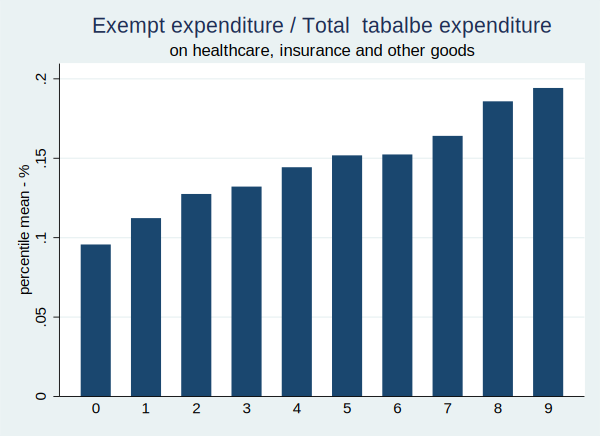

In [67]:
graph bar (mean) simple_exm_ratio_cat_inc_ , over(C09New) ///
    title("Exempt expenditure / Total  taxable expenditure") ///
    subtitle("on healthcare, insurance and other goods") ///
    ytitle("percentile mean - %")


/* graph bar (mean) simple_exm_ratio_cat_inc_ simple_exm_ratio_cat_inc_SC, over(C09New) ///
    title("Exempt expenditure(Cat 6 , 13, 14, 0) / Total expenditure") ///
    ytitle("percentile mean - %") */

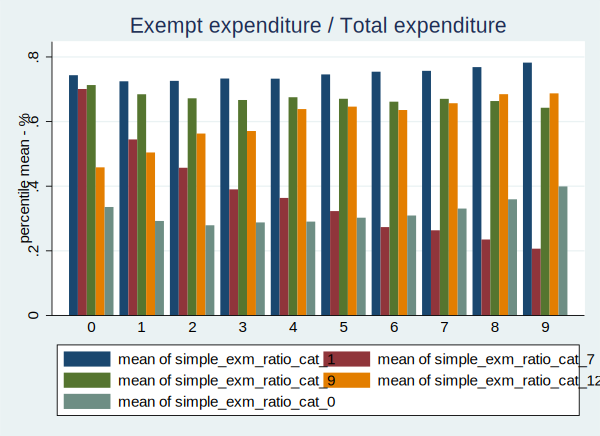

In [68]:
graph bar (mean) simple_exm_ratio_cat_1 simple_exm_ratio_cat_7 simple_exm_ratio_cat_9  simple_exm_ratio_cat_12 simple_exm_ratio_cat_0 ///
    , over(C09New) ///
    title("Exempt expenditure / Total expenditure") ///
    ytitle("percentile mean - %")

In [430]:
save `expenditure_tempfile', replace
/* save "total_HH_exp_`RU'_`year'.dta", replace */
/* save "`RU'_`year'_monthly_HH_exp_by_vat_char.dta", replace */

file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St06638.00000l saved


---
# Total VAT Calculation

---
# Add Reference month

In [431]:
clear
local path "`dir'/`RU'/`RU'`year'Data.csv"
import delimited "`path'", delimiter(",") clear 
keep address mahmorajeh

merge 1:1 address using `expenditure_tempfile'
/* merge 1:1 address using "`RU'_`year'_monthly_HH_exp_by_vat_char.dta" */




(17 vars, 19,306 obs)



    Result                           # of obs.
    -----------------------------------------
    not matched                            30
        from master                        30  (_merge==1)
        from using                          0  (_merge==2)

    matched                            19,276  (_merge==3)
    -----------------------------------------


In [432]:
drop _merge

In [433]:
drop if mahmorajeh == 0
replace mahmorajeh = mahmorajeh - 1
replace mahmorajeh = 12 if mahmorajeh == 0


(0 observations deleted)

(19,306 real changes made)

(1,547 real changes made)


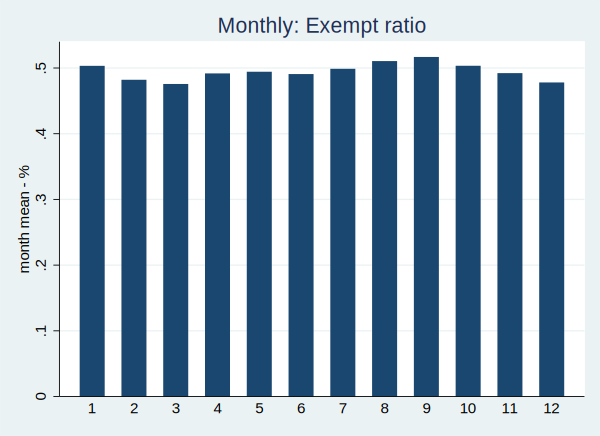

In [434]:
graph bar (mean) monthly_exm_ratio, over(mahmorajeh) ///
    title("Monthly: Exempt ratio") ///
    ytitle("month mean - %")

In [435]:
tabstat monthly_exm_ratio , by(mahmorajeh)


Summary for variables: monthly_exm_ratio
     by categories of: mahmorajeh (MahMorajeh)

mahmorajeh |      mean
-----------+----------
         1 |  .5033028
         2 |  .4820916
         3 |  .4756802
         4 |  .4917883
         5 |  .4943197
         6 |  .4907843
         7 |  .4987912
         8 |  .5105325
         9 |  .5168222
        10 |  .5034215
        11 |  .4922165
        12 |  .4780104
-----------+----------
     Total |  .4948699
----------------------


In [436]:
reg C09New mahmorajeh


      Source |       SS           df       MS      Number of obs   =    19,276
-------------+----------------------------------   F(1, 19274)     =   1016.14
       Model |  7623.08171         1  7623.08171   Prob > F        =    0.0000
    Residual |  144593.085    19,274  7.50197599   R-squared       =    0.0501
-------------+----------------------------------   Adj R-squared   =    0.0500
       Total |  152216.167    19,275  7.89707741   Root MSE        =     2.739

------------------------------------------------------------------------------
      C09New |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
  mahmorajeh |   .1832718   .0057493    31.88   0.000     .1720026     .194541
       _cons |   2.558089   .0423337    60.43   0.000     2.475111    2.641067
------------------------------------------------------------------------------


In [437]:
gen flag_ind = string(C09New) + "_" + string(mahmorajeh)
egen percentile_month_flag = tag(flag_ind)




(19,178 observations deleted)


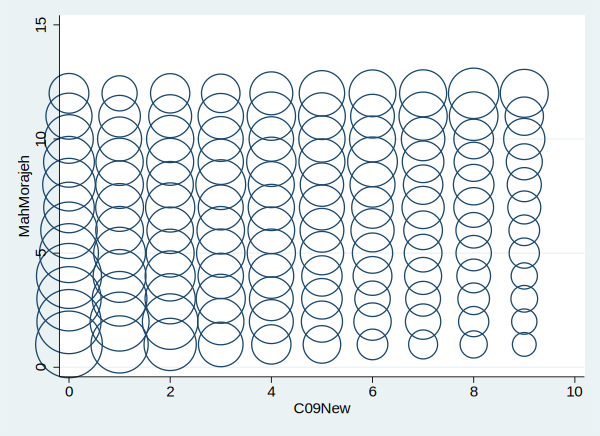

In [438]:
preserve
egen counter = count(1), by(mahmorajeh C09New)
/* egen flag_ = tag(counter) */
/* drop if flag_ == 0 */
drop if percentile_month_flag == 0
scatter mahmorajeh C09New [fweight=counter], msymbol(Oh)
restore

In [439]:
/* hist mahmorajeh if C09New == 0, percent */

In [440]:
/* hist mahmorajeh if C09New == 9, percent */

# Month Adjustment

In [441]:
local cats 0 1 3 4 5 6 7 8 9 11 
foreach cat of local cats {
    egen avg_monthly_cat_exm_`cat' = mean(monthly_cat_exm_`cat'), by(C09New mahmorajeh)
    egen m_percentile_mean_cat_exm_`cat' = sum(avg_monthly_cat_exm_`cat' * (percentile_month_flag == 1)), by(C09New)

    egen avg_monthly_cat_9_`cat' = mean(monthly_cat_9_`cat'), by(C09New mahmorajeh)
    egen m_percentile_mean_cat_9_`cat' = sum(avg_monthly_cat_9_`cat' * (percentile_month_flag == 1)), by(C09New)

    egen avg_monthly_cat_other_`cat' = mean(monthly_cat_other_`cat'), by(C09New mahmorajeh)
    egen m_percentile_mean_cat_other_`cat' = sum(avg_monthly_cat_other_`cat' * (percentile_month_flag == 1)), by(C09New)
}


local cats 0 3 4 5 6 7 8 9
foreach cat of local cats {
    gen ad_cat_exm_`cat'   = m_percentile_mean_cat_exm_`cat'     + yearly_cat_exm_`cat'
    gen ad_cat_9_`cat'     = m_percentile_mean_cat_9_`cat'       + yearly_cat_9_`cat'
    gen ad_cat_other_`cat' = m_percentile_mean_cat_other_`cat'   + yearly_cat_other_`cat'
}

local cats 1 11
foreach cat of local cats {
    gen ad_cat_exm_`cat'   = m_percentile_mean_cat_exm_`cat'
    gen ad_cat_9_`cat'     = m_percentile_mean_cat_9_`cat'
    gen ad_cat_other_`cat' = m_percentile_mean_cat_other_`cat'
}

local cats 10 12
foreach cat of local cats {
    gen ad_cat_exm_`cat'   = yearly_cat_exm_`cat'
    gen ad_cat_9_`cat'     = yearly_cat_9_`cat'
    gen ad_cat_other_`cat' = yearly_cat_other_`cat'
}



(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)


(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 mi

In [442]:
local cats 0 1 3 4 5 6 7 8 9 10 11 12
foreach cat of local cats {
    gen ad_exm_ratio_cat_`cat' = ad_cat_exm_`cat' / (ad_cat_9_`cat' + ad_cat_exm_`cat' + ad_cat_other_`cat')
    
    gen ad_cat_texp_`cat' = ad_cat_exm_`cat' + ad_cat_9_`cat' + ad_cat_other_`cat'
}



(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(30 missing values generated)
(12,614 missing values generated)
(30 missing values generated)
(3,349 missing values generated)
(30 missing values generated)


In [443]:
egen avg_monthly_tv_exm = mean(monthly_tv_exm), by(C09New mahmorajeh)
egen monthly_percentile_mean_tv_exm = sum(avg_monthly_tv_exm * (percentile_month_flag == 1)), by(C09New)

egen avg_monthly_tv_9 = mean(monthly_tv_9), by(C09New mahmorajeh)
egen monthly_percentile_mean_tv_9 = sum(avg_monthly_tv_9 * (percentile_month_flag == 1)), by(C09New)

egen avg_monthly_tv_other = mean(monthly_tv_other), by(C09New mahmorajeh)
egen monthly_percentile_mean_tv_other = sum(avg_monthly_tv_other * (percentile_month_flag == 1)), by(C09New)


(30 missing values generated)


(30 missing values generated)


(30 missing values generated)



In [444]:
gen ad_tv_exm = monthly_percentile_mean_tv_exm + yearly_tv_exm
gen ad_tv_9 = monthly_percentile_mean_tv_9 + yearly_tv_9
gen ad_tv_other = monthly_percentile_mean_tv_other + yearly_tv_other


(30 missing values generated)

(30 missing values generated)

(30 missing values generated)


In [445]:
gen ad_exm_ratio = ad_tv_exm / (ad_tv_exm + ad_tv_9 + ad_tv_other)

(30 missing values generated)


### Exempt Exp(ad)

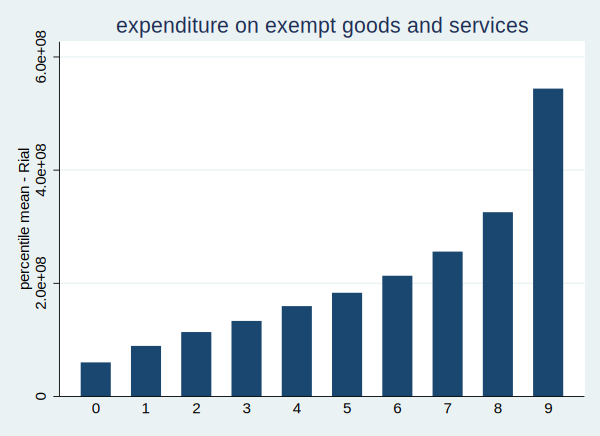

In [446]:
graph bar (mean) ad_tv_exm, over(C09New) ///
    title("expenditure on exempt goods and services") ///
    ytitle("percentile mean - Rial")

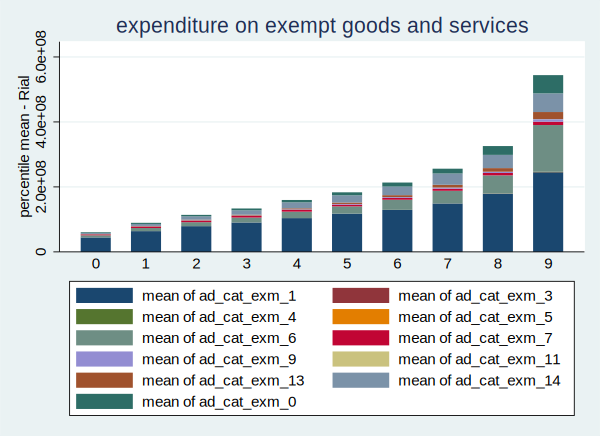

In [447]:
graph bar (mean) ad_cat_exm_1 ad_cat_exm_3 ad_cat_exm_4 ad_cat_exm_5 ///
    ad_cat_exm_6 ad_cat_exm_7 ad_cat_exm_9 ad_cat_exm_11  ad_cat_exm_13 ad_cat_exm_14 ad_cat_exm_0 ///
    , over(C09New) stack  ///
    title("expenditure on exempt goods and services") ///
    ytitle("percentile mean - Rial")


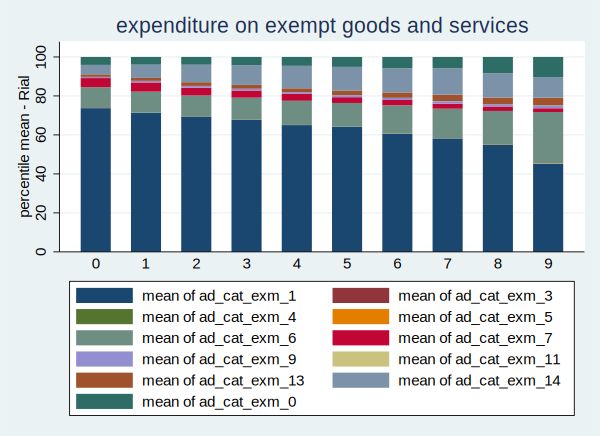

In [448]:
graph bar (mean) ad_cat_exm_1 ad_cat_exm_3 ad_cat_exm_4 ad_cat_exm_5 ///
    ad_cat_exm_6 ad_cat_exm_7 ad_cat_exm_9 ad_cat_exm_11  ad_cat_exm_13 ad_cat_exm_14 ad_cat_exm_0 ///
    , over(C09New) stack  percentage ///
    title("expenditure on exempt goods and services") ///
    ytitle("percentile mean - Rial")


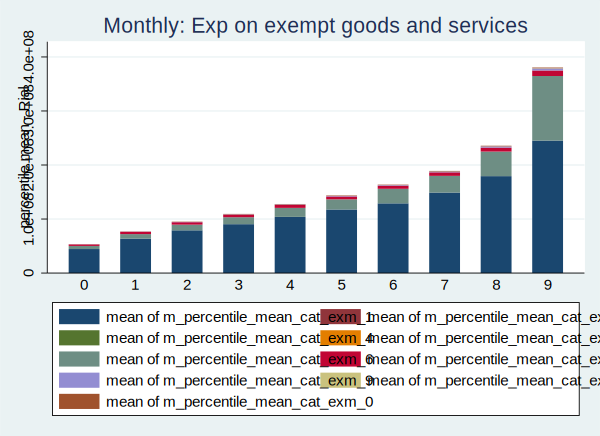

In [449]:
graph bar (mean) m_percentile_mean_cat_exm_1 m_percentile_mean_cat_exm_3 m_percentile_mean_cat_exm_4 m_percentile_mean_cat_exm_5 ///
    m_percentile_mean_cat_exm_6 m_percentile_mean_cat_exm_7 m_percentile_mean_cat_exm_9 m_percentile_mean_cat_exm_11 m_percentile_mean_cat_exm_0 ///
    , over(C09New) stack  ///
    title("Monthly: Exp on exempt goods and services") ///
    ytitle("percentile mean - Rial")


### Exempt Ratio(ad)

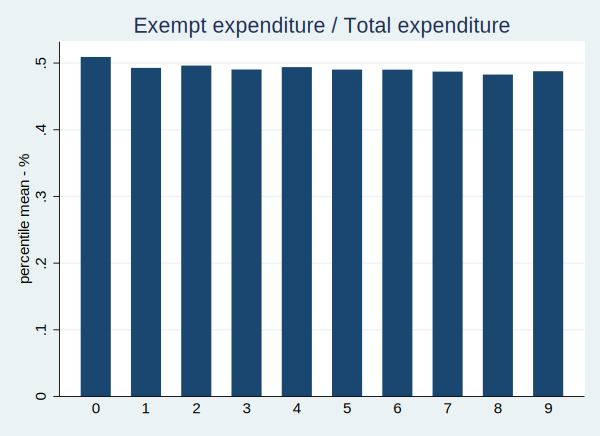

In [450]:
graph bar (mean) ad_exm_ratio, over(C09New) ///
    title("Exempt expenditure / Total expenditure") ///
    ytitle("percentile mean - %")

/* graph bar (mean) ad_exm_ratio, over(C09New) ///
    title("نسبت مخارج بر کالا و خدمات معاف از مالیات به کل مصارف") ///
    ytitle("میانگین هر دهک - درصد") ///
    b1title("دهک هزینه‌ای(۱:فقیرترین)")     */

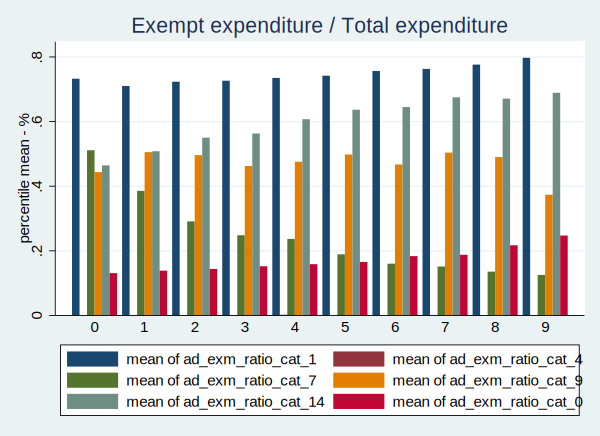

In [451]:
graph bar (mean) ad_exm_ratio_cat_1 ad_exm_ratio_cat_4 ad_exm_ratio_cat_7 ad_exm_ratio_cat_9 ad_exm_ratio_cat_14 ad_exm_ratio_cat_0 ///
    , over(C09New) ///
    title("Exempt expenditure / Total expenditure") ///
    ytitle("percentile mean - %")

In [452]:
tabstat ad_tv_exm [w=weight], s(sum, mean, med, p25, p75) 

(analytic weights assumed)

    variable |       sum      mean       p50       p25       p75
-------------+--------------------------------------------------
   ad_tv_exm |  4.08e+15  2.03e+08  1.64e+08  1.10e+08  2.46e+08
----------------------------------------------------------------


In [453]:
tabstat simple_tv_exm [w=weight], s(sum, mean, med, p25, p75) 

(analytic weights assumed)

    variable |       sum      mean       p50       p25       p75
-------------+--------------------------------------------------
simple_tv_~m |  3.97e+15  1.98e+08  1.51e+08  9.77e+07  2.37e+08
----------------------------------------------------------------


In [454]:
/* hist ad_tv_exm */

In [455]:
gen dahak_hazineh = C09New + 1

label define percentile_label 1 "دهک ۱" 2 "دهک ۲" 3 "دهک ۳" 4 "دهک ۴" 5 "دهک ۵" 6 "دهک ۶" 7 "دهک ۷" 8 "دهک ۸" 9 "دهک ۹" 10 "دهک ۱۰"
label values dahak_hazineh percentile_label


(30 missing values generated)




In [456]:
/* use "exp_`RU'_`year'.dta" */

save "exp_`RU'_`year'.dta", replace

file exp_U_99.dta saved


# Paid VAT

In [457]:
/* drop paid_vat* */

/* gen paid_vat = 0.09 * simple_tv_9 */

gen paid_vat = 0.09 * ad_tv_9
gen paid_vat_mToman = paid_vat / 10 / 1000 / 1000


(30 missing values generated)

(30 missing values generated)


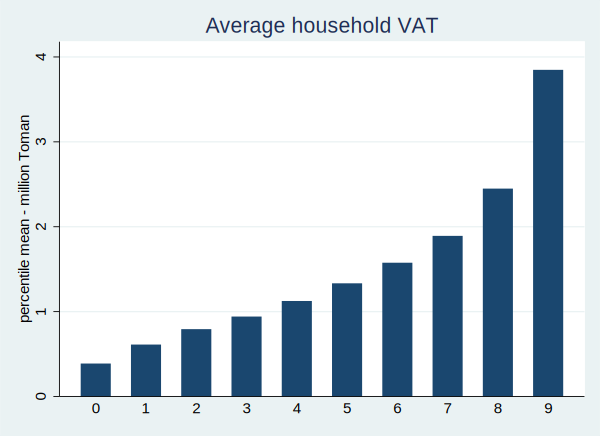

In [458]:
graph bar (mean) paid_vat_mToman ///
    , over(C09New) ///
    title("Average household VAT") ///
    ytitle("percentile mean - million Toman") ///


/* graph bar (mean) paid_vat_mToman ///
    , over(C09New) ///
    title("متوسط مالیات بر ارزش افزوده خانوار") ///
    ytitle("میانگین دهک(میلیون تومان)") ///
    b1title("دهک هزینه‌ای(۱:فقیرترین)") */


In [459]:
des Daramad NHaz


              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
Daramad         double  %10.0g                Daramad
NHazineh        double  %10.0g                NHazineh


In [460]:
/* drop VAT_to*
drop vat_exp* */

gen VAT_to_Income = paid_vat / Daramad * 100
gen VAT_to_Exp = paid_vat / NHazineh * 100

/* gen vat_exp_to_income = ad_tv_9 / Daramad * 100
gen vat_exp_to_Exp = ad_tv_9 / NHazineh * 100 */


(30 missing values generated)

(30 missing values generated)


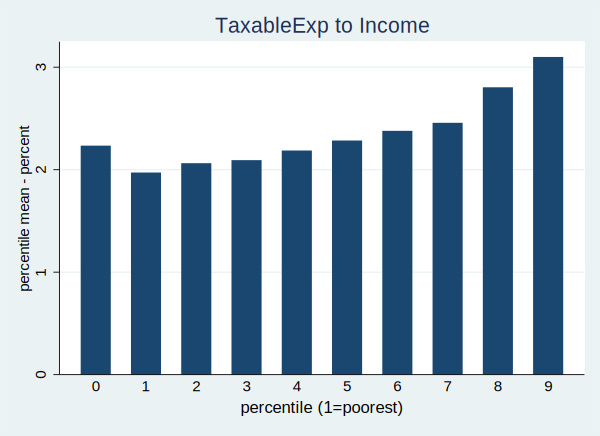

In [461]:
graph bar (mean) VAT_to_Income ///
    , over(C09New) ///
    title("TaxableExp to Income") ///
    ytitle("percentile mean - percent") ///
    b1title("percentile (1=poorest)")

/* graph bar (mean) VAT_to_Income ///
    , over(dahak_hazineh) ///
    title("نسبت مالیات بر ارزش افزوده به درآمد خانوار") ///
    ytitle("میانکین هر دهک - درصد") ///
    b1title("دهک هزینه‌ای(۱:فقیرترین)") */

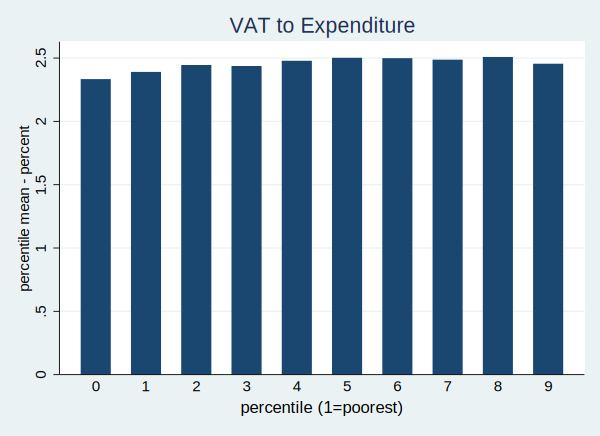

In [462]:
graph bar (mean) VAT_to_Exp ///
    , over(C09New) ///
    title("VAT to Expenditure") ///
    ytitle("percentile mean - percent") ///
    b1title("percentile (1=poorest)")


/* graph bar (mean) VAT_to_Income ///
    , over(dahak_hazineh) ///
    title("نسبت مالیات بر ارزش افزوده به هزینه خانوار") ///
    ytitle("میانکین هر دهک - درصد") ///
    b1title("دهک هزینه‌ای(۱:فقیرترین)") */


In [463]:
/* gen my_exp */
gen Exp_to_Daramad = NHazineh / Daramad

(30 missing values generated)


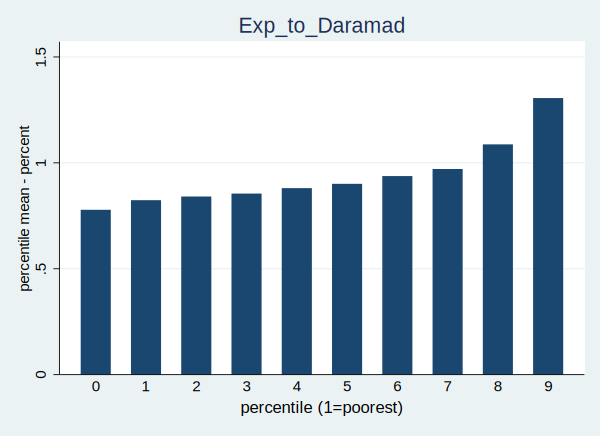

In [464]:
graph bar (mean) Exp_to_Daramad ///
    , over(C09New) ///
    title("Exp_to_Daramad") ///
    ytitle("percentile mean - percent") ///
    b1title("percentile (1=poorest)")

In [465]:
gen ad_my_exp = ad_tv_9 + ad_tv_exm + ad_tv_other

(30 missing values generated)


In [466]:
/* drop my_vat_to_exp */
gen my_vat_to_exp = ad_tv_9  / ad_my_exp

(30 missing values generated)


In [467]:
graph bar (mean) Exp_9_to_total_Exp ///
    , over(C09New) ///
    title("Exp_9_to_total_Exp") ///
    ytitle("percentile mean - percent") ///
    b1title("percentile (1=poorest)")

variable Exp_9_to_total_Exp not found



In [468]:
/* drop Exp_9_to_total_Exp */
gen Exp_9_to_total_Exp = VAT_to_Exp * 100 / 9

(30 missing values generated)


In [469]:
tabstat Exp_9_to_total_Exp , by(C09New)


Summary for variables: Exp_9_to_total_Exp
     by categories of: C09New (C09New)

  C09New |      mean
---------+----------
       0 |  25.93151
       1 |  26.56284
       2 |  27.16834
       3 |   27.0813
       4 |   27.5399
       5 |  27.80241
       6 |  27.76844
       7 |   27.6366
       8 |  27.87599
       9 |  27.28395
---------+----------
   Total |  27.13772
--------------------
